In [1]:
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:/Data/CourseraClass/gapminder.csv')
len(data)
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


## Data Management

### Remove N/A records

In [3]:
data['suicideper100th'] = data['suicideper100th'].replace(r'\s+', np.nan, regex=True)
data['internetuserate'] = data['internetuserate'].replace(r'\s+', np.nan, regex=True)
data['incomeperperson']= data['incomeperperson'].replace(r'\s+', np.nan, regex=True)
data['employrate']= data['employrate'].replace(r'\s+', np.nan, regex=True)
data['urbanrate']= data['urbanrate'].replace(r'\s+', np.nan, regex=True)
data['alcconsumption']= data['alcconsumption'].replace(r'\s+', np.nan, regex=True)
data['armedforcesrate']= data['armedforcesrate'].replace(r'\s+', np.nan, regex=True)
data['breastcancerper100th']= data['breastcancerper100th'].replace(r'\s+', np.nan, regex=True)
data['co2emissions']= data['co2emissions'].replace(r'\s+', np.nan, regex=True)
data['femaleemployrate']= data['femaleemployrate'].replace(r'\s+', np.nan, regex=True)
data['lifeexpectancy']= data['lifeexpectancy'].replace(r'\s+', np.nan, regex=True)
data['hivrate']= data['hivrate'].replace(r'\s+', np.nan, regex=True)

data_clean = data.dropna()
print (len(data_clean))

135


### Make sure the fields are numbers

In [4]:
data_clean['suicideper100th'] = data_clean['suicideper100th'].convert_objects(convert_numeric=True)
data_clean['internetuserate'] = data_clean['internetuserate'].convert_objects(convert_numeric=True)
data_clean['incomeperperson'] = data_clean['incomeperperson'].convert_objects(convert_numeric=True)
data_clean['employrate'] = data_clean['employrate'].convert_objects(convert_numeric=True)
data_clean['urbanrate'] = data_clean['urbanrate'].convert_objects(convert_numeric=True)
data_clean['alcconsumption'] = data_clean['alcconsumption'].convert_objects(convert_numeric=True)
data_clean['armedforcesrate'] = data_clean['armedforcesrate'].convert_objects(convert_numeric=True)
data_clean['breastcancerper100th'] = data_clean['breastcancerper100th'].convert_objects(convert_numeric=True)
data_clean['co2emissions'] = data_clean['co2emissions'].convert_objects(convert_numeric=True)
data_clean['femaleemployrate'] = data_clean['co2emissions'].convert_objects(convert_numeric=True)
data_clean['lifeexpectancy'] = data_clean['co2emissions'].convert_objects(convert_numeric=True)
data_clean['hivrate'] = data_clean['co2emissions'].convert_objects(convert_numeric=True)
data_clean.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,2.932109e+09,2.932109e+09,12.500073,2.932109e+09,.42009452521537,2,590.509814347428,4.848770,50.500000,65.22
4,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,2.483580e+08,2.483580e+08,9.999954,2.483580e+08,,-2,172.999227388199,14.554677,75.699997,56.70
6,Argentina,10749.419238,9.35,0.560987,73.9,5.872119e+09,5.872119e+09,5.872119e+09,36.000335,5.872119e+09,.635943800978195,8,768.428299701347,7.765584,58.400002,92.00
7,Armenia,1326.741757,13.66,2.618438,51.6,5.121967e+07,5.121967e+07,5.121967e+07,44.001025,5.121967e+07,,5,603.763057563433,3.741588,40.099998,63.86
9,Australia,25249.986061,10.21,0.486280,83.2,1.297009e+10,1.297009e+10,1.297009e+10,75.895654,1.297009e+10,1.91302610912404,10,2825.39109539914,8.470030,61.500000,88.74


Create categorial response based on percentiles. Those in the lower 50 percentile will be coded 1 to indicate low rate. Those in the upper 50 percentile will be coded as 2 to indicate high rate.

In [5]:
print (round(np.percentile(data_clean['suicideper100th'],25)))
print (round(np.percentile(data_clean['suicideper100th'],50)))
print (round(np.percentile(data_clean['suicideper100th'],75)))

6.0
9.0
13.0


In [6]:
data_clean['suiciderate'] = 0
data_clean['suiciderate'][(data_clean['suicideper100th']>=9)] = 1
data_clean['suiciderate'][(data_clean['suicideper100th']< 9)] = 0
data_clean['suiciderate'].describe()

count    135.000000
mean       0.518519
std        0.501518
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: suiciderate, dtype: float64

### Standardize predictors to have mean = 0 and sd = 1

In [7]:
#select predictor variables and target variable as separate data sets  
predictors = data_clean[['armedforcesrate','breastcancerper100th','internetuserate', 'incomeperperson', 'employrate', 
                         'urbanrate','alcconsumption','co2emissions','femaleemployrate','lifeexpectancy','hivrate']]
target = data_clean.suiciderate
#predictors=predvar.copy()
predictors['internetuserate']=preprocessing.scale(predictors['internetuserate'].astype('float64'))
predictors['incomeperperson']=preprocessing.scale(predictors['incomeperperson'].astype('float64'))
predictors['employrate']=preprocessing.scale(predictors['employrate'].astype('float64'))
predictors['urbanrate']=preprocessing.scale(predictors['urbanrate'].astype('float64'))
predictors['alcconsumption']=preprocessing.scale(predictors['alcconsumption'].astype('float64'))
predictors['armedforcesrate']=preprocessing.scale(predictors['armedforcesrate'].astype('float64'))
predictors['breastcancerper100th']=preprocessing.scale(predictors['breastcancerper100th'].astype('float64'))
predictors['co2emissions']=preprocessing.scale(predictors['co2emissions'].astype('float64'))
predictors['femaleemployrate']=preprocessing.scale(predictors['femaleemployrate'].astype('float64'))
predictors['lifeexpectancy']=preprocessing.scale(predictors['lifeexpectancy'].astype('float64'))
predictors['hivrate']=preprocessing.scale(predictors['hivrate'].astype('float64'))
predictors.describe()

,armedforcesrate,breastcancerper100th,internetuserate,incomeperperson,employrate,urbanrate,alcconsumption,co2emissions,femaleemployrate,lifeexpectancy,hivrate
count,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02
mean,-5.684753e-17,-6.085667e-17,-2.796117e-17,-4.934325e-18,-2.228670e-16,-5.016563e-17,1.398059e-16,1.500857e-17,1.500857e-17,1.500857e-17,1.500857e-17
std,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00,1.003724e+00
min,-9.020279e-01,-1.444561e+00,-1.205987e+00,-6.926610e-01,-1.972443e+00,-2.106308e+00,-1.461419e+00,-2.309139e-01,-2.309139e-01,-2.309139e-01,-2.309139e-01
25%,-5.998088e-01,-7.598178e-01,-8.853442e-01,-6.486783e-01,-6.515907e-01,-7.820238e-01,-7.836726e-01,-2.284486e-01,-2.284486e-01,-2.284486e-01,-2.284486e-01
50%,-2.693342e-01,-3.431967e-01,-2.209194e-01,-4.650292e-01,-8.407608e-02,1.233493e-01,-1.653777e-01,-2.201813e-01,-2.201813e-01,-2.201813e-01,-2.201813e-01
75%,1.878847e-01,5.086077e-01,9.411054e-01,9.862827e-02,5.336607e-01,7.467284e-01,6.510885e-01,-1.443303e-01,-1.443303e-01,-1.443303e-01,-1.443303e-01
max,6.514267e+00,2.564901e+00,2.109388e+00,4.018560e+00,2.356738e+00,1.955857e+00,3.088597e+00,1.054805e+01,1.054805e+01,1.054805e+01,1.054805e+01


## Modeling and Prediction

### Split into training and testing sets

In [8]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, target, test_size=.3, random_state=123)

### View the splits

In [9]:
print (pred_train.shape)
print (pred_test.shape)
print (tar_train.shape)
print (tar_test.shape)

(94, 11)
(41, 11)
(94,)
(41,)


### Build model on training data

In [10]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

### Print variable names and regression coefficient

In [11]:
dict(zip(predictors.columns, model.coef_))

{'alcconsumption': 0.13034640675905282,
 'armedforcesrate': -0.0034354488729439088,
 'breastcancerper100th': 0.0,
 'co2emissions': 0.025058938503379646,
 'employrate': 0.0,
 'femaleemployrate': 0.0,
 'hivrate': 0.0,
 'incomeperperson': 0.022481114705785139,
 'internetuserate': 0.092372551437067171,
 'lifeexpectancy': 0.0,
 'urbanrate': -0.12163780167931562}

### Plot coefficient progression

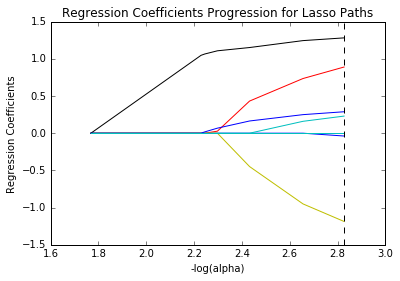

In [12]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

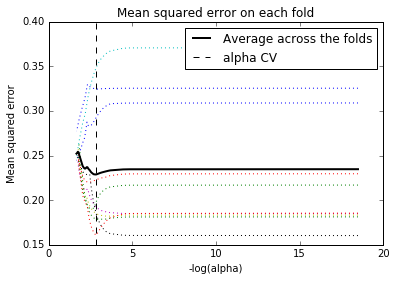

In [13]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [14]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.205714910399
test data MSE
0.204387479178


In [15]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.173774114414
test data R-square
0.181963446432


## Conclusion

A lasso regression analysis was conducted to identify a subset of variables from a pool of 11 quantitative predictor variables that best predicted a quantitative response variable measuring high suicide rates. Quantitative predictor variables include armed forces rate, breast cancer rate, internet usage rate, income per person, employment rate, urban rate, alcohol consumption, co2 emissions, female employment rate, life expectancy, and HIV rate. 

Data were randomly split into a training set that included 70% of the observations (N=94) and a test set that included 30% of the observations (N=41). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

Of the 11 predictor variables, 6 were retained in the selected model. During the estimation process, urban rate and alcohol consumption were most strongly associated with high suicide rates, followed by urban rate and internet usage. Urban rate was negatively associated with suicide rate while alcohol consumption and internet rate were positively associated with high suicide rates. Other predictors associated with high suicide rates included co2 emissions and employment rate. Other predictors associated with lower suicide rates included armed forces rates. 

These 6 variables accounted for 18.2% of the variance in the high suicide rate response variable.